In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   28.7967  19019 non-null  float64
 1   16.0021  19019 non-null  float64
 2   2.6449   19019 non-null  float64
 3   0.3918   19019 non-null  float64
 4   0.1982   19019 non-null  float64
 5   27.7004  19019 non-null  float64
 6   22.011   19019 non-null  float64
 7   -8.2027  19019 non-null  float64
 8   40.092   19019 non-null  float64
 9   81.8828  19019 non-null  float64
 10  g        19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

28.7967    0
16.0021    0
2.6449     0
0.3918     0
0.1982     0
27.7004    0
22.011     0
-8.2027    0
40.092     0
81.8828    0
g          0
dtype: int64

In [7]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))
     

In [8]:
df

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [9]:
df.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])

In [12]:
X = df.iloc[:,0:-1]
y = df['class']

In [13]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098


In [14]:

samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [15]:

samples

[(        fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
  5481    17.7026  12.5796  2.4289  0.6108  0.3408  -3.6221   12.0049   -7.6815   
  9782    54.3867  18.5857  3.1614  0.2255  0.1134  43.3999   42.1384    4.8725   
  8102    36.0738  12.6927  2.5563  0.3750  0.2458  38.6242   26.4191    8.9849   
  11784   13.0934  10.6012  2.2109  0.7754  0.4831  13.3214    3.9047  -10.0662   
  70      66.1331  25.9259  3.1984  0.1495  0.0750  42.2957   50.5528  -12.7104   
  ...         ...      ...     ...     ...     ...      ...       ...       ...   
  9225    21.4824  12.6292  2.3253  0.4444  0.2293  28.1533   11.1342    9.8983   
  13123  112.4543  73.3094  3.4562  0.2239  0.1313 -19.6467 -104.6703  -44.8812   
  9845    16.5073  11.5561  2.1931  0.5962  0.3237   0.3593   -3.5917    5.1400   
  10799   44.2294  16.9893  2.7255  0.2973  0.1947  41.1312  -11.7493   10.2831   
  2732    21.5993  19.7839  2.7608  0.3677  0.1865 -14.1571   13.1752   12.6847   
  
 

In [16]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [17]:

def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [18]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  4.17 Best Epsilon =  4.6
Best Accuracy =  0.4 Best Kernel =  sigmoid Best Nu =  4.67 Best Epsilon =  6.55
Best Accuracy =  0.38 Best Kernel =  sigmoid Best Nu =  8.05 Best Epsilon =  4.33
Best Accuracy =  0.41 Best Kernel =  sigmoid Best Nu =  6.56 Best Epsilon =  5.27
Best Accuracy =  0.47 Best Kernel =  linear Best Nu =  9.63 Best Epsilon =  1.5
Best Accuracy =  0.38 Best Kernel =  sigmoid Best Nu =  0.65 Best Epsilon =  9.79
Best Accuracy =  0.64 Best Kernel =  poly Best Nu =  6.88 Best Epsilon =  8.92
Best Accuracy =  0.39 Best Kernel =  sigmoid Best Nu =  5.6 Best Epsilon =  8.19
Best Accuracy =  0.72 Best Kernel =  linear Best Nu =  0.37 Best Epsilon =  7.36
Best Accuracy =  0.4 Best Kernel =  sigmoid Best Nu =  3.84 Best Epsilon =  6.23


In [19]:

result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.64,rbf,4.17,4.60
1,2,0.40,sigmoid,4.67,6.55
2,3,0.38,sigmoid,8.05,4.33
3,4,0.41,sigmoid,6.56,5.27
4,5,0.47,linear,9.63,1.50
5,6,0.38,sigmoid,0.65,9.79
6,7,0.64,poly,6.88,8.92
7,8,0.39,sigmoid,5.60,8.19
8,9,0.72,linear,0.37,7.36
9,10,0.40,sigmoid,3.84,6.23


In [20]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [21]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

In [22]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1) 

No handles with labels found to put in legend.


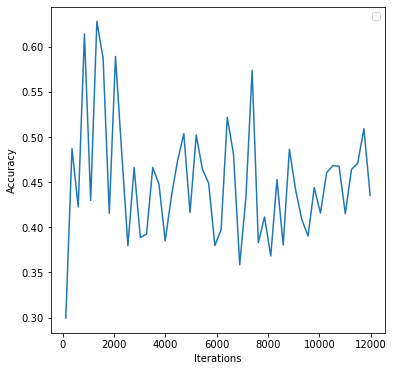

In [24]:

plt.figure(figsize=(6, 6))
#plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()
     